In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data using Dask
df_dask = dd.read_parquet(r"/backend/uploads/yellow_tripdata_2024-01.parquet")

In [3]:
df_dask.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
df_dask.info()
df_dask.dtypes

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 19 entries, VendorID to Airport_fee
dtypes: datetime64[us](2), float64(10), int32(3), int64(3), string(1)

VendorID                           int32
tpep_pickup_datetime      datetime64[us]
tpep_dropoff_datetime     datetime64[us]
passenger_count                    int64
trip_distance                    float64
RatecodeID                         int64
store_and_fwd_flag       string[pyarrow]
PULocationID                       int32
DOLocationID                       int32
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
Airport_fee                      float64
dtype: object

In [5]:
# Compute the sum of NaN values per column
df_dask.isnull().sum().compute()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [6]:
# Statistics
df_dask.describe().compute()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,2.964624e+06,2964624,2964624,2.824462e+06,2.964624e+06,2.824462e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.964624e+06,2.824462e+06,2.824462e+06
mean,1.754204e+00,NaN,NaN,1.339281e+00,3.652169e+00,2.069359e+00,1.660179e+02,1.651167e+02,1.161271e+00,1.817506e+01,1.451598e+00,4.833823e-01,3.335870e+00,5.270212e-01,9.756319e-01,2.680150e+01,2.256122e+00,1.411611e-01
std,4.325902e-01,NaN,NaN,8.502817e-01,2.254626e+02,9.823219e+00,6.362391e+01,6.931535e+01,5.808686e-01,1.894955e+01,1.804102e+00,1.177600e-01,3.896551e+00,2.128310e+00,2.183645e-01,2.338558e+01,8.232747e-01,4.876239e-01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.990000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-8.000000e+01,-1.000000e+00,-9.000000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-01-09 15:59:19.750000,2024-01-09 16:16:23,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.538000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-01-17 10:45:37.500000,2024-01-17 11:03:51.500000,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.700000e+00,0.000000e+00,1.000000e+00,2.010000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-01-24 18:23:52.250000,2024-01-24 18:40:29,1.000000e+00,3.110000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.120000e+00,0.000000e+00,1.000000e+00,2.856000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+03,1.425000e+01,4.000000e+00,4.280000e+02,1.159200e+02,1.000000e+00,5.000000e+03,2.500000e+00,1.750000e+00


In [1]:
# Remplir les valeurs manquantes
df_dask = df_dask.fillna({
    "RatecodeID": 1,
    "store_and_fwd_flag": "N",  # Vous pouvez choisir "N" ou "Y"
    "congestion_surcharge": 2.5,
    "Airport_fee": 0
})

NameError: name 'df_dask' is not defined

In [8]:
# Remplacer les valeurs manquantes de `passenger_count` par la moyenne
mean_passenger_count = df_dask["passenger_count"].mean().compute()
df_dask = df_dask.assign(passenger_count=df_dask["passenger_count"].fillna(mean_passenger_count))

In [9]:
# Filtrer les trajets aberrants
df_dask = df_dask[(df_dask["fare_amount"] >= 2) & (df_dask["trip_distance"] >= 0.5)]

In [10]:
# Convertir les dates en datetime
df_dask["tpep_pickup_datetime"] = dd.to_datetime(df_dask["tpep_pickup_datetime"])
df_dask["tpep_dropoff_datetime"] = dd.to_datetime(df_dask["tpep_dropoff_datetime"])

In [11]:
# Compute the sum of NaN values per column
df_dask.isnull().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

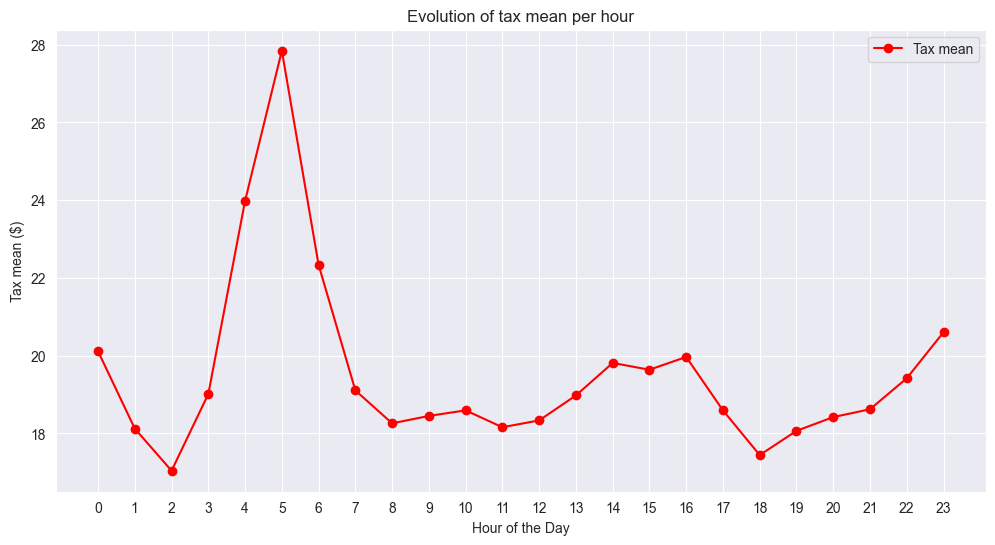

In [12]:
# We can know the average fare for each hour of the day .
df_dask["hour"] = df_dask["tpep_pickup_datetime"].dt.hour
df_dask["day_of_week"] = df_dask["tpep_pickup_datetime"].dt.dayofweek

df_agg = df_dask.groupby("hour")["fare_amount"].mean().compute()

plt.figure(figsize=(12, 6))
plt.plot(df_agg.index, df_agg.values, marker='o', linestyle='-', color='r', label="Tax mean")
plt.xlabel("Hour of the Day")
plt.ylabel("Tax mean ($)")
plt.title("Evolution of tax mean per hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

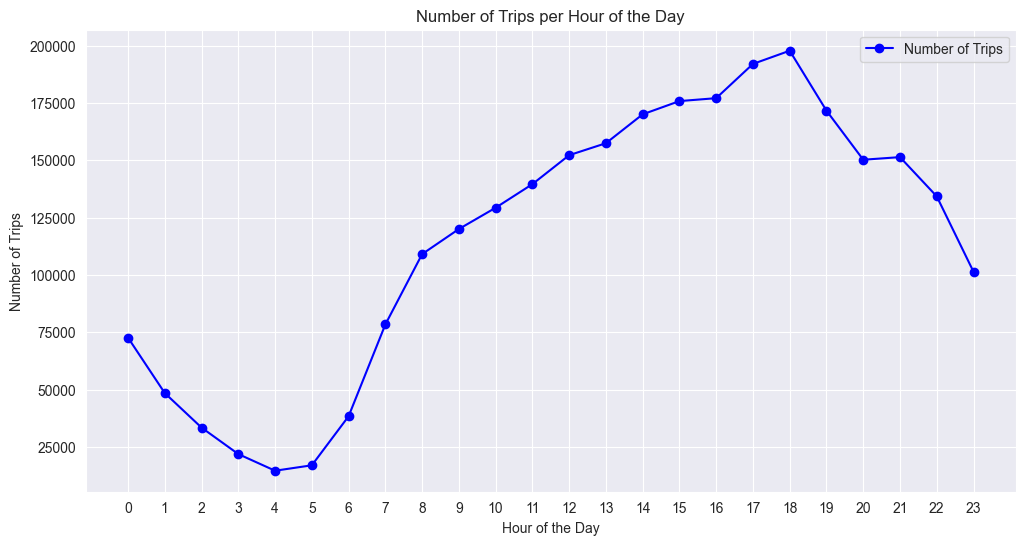

In [13]:
# We can know the hour when there are the most trips during the day .
df_dask["hour"] = df_dask["tpep_pickup_datetime"].dt.hour

df_trips = df_dask.groupby("hour").size().compute()

plt.figure(figsize=(12, 6))
plt.plot(df_trips.index, df_trips.values, marker='o', linestyle='-', color='b', label="Number of Trips")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# We can see that even if the tax in 5 a.m is the highest one but it does not mean that is the most hour that taxis work in.
# If we want to know the best profitable hour in the day we do some small calculations,we multiply the number of trips by the price of the tax or to be more accurate we count the total revenue by adding on the fare amount.

In [15]:
df_dask["fare_amount"] = df_dask["fare_amount"].astype(float)

df_dask["tpep_pickup_datetime"] = dd.to_datetime(df_dask["tpep_pickup_datetime"])

df_dask["hour"] = df_dask["tpep_pickup_datetime"].dt.hour

df_revenue = df_dask.groupby("hour").agg(
    total_revenue=("fare_amount", "sum"),
    count=("fare_amount", "count")
)

df_revenue = df_revenue.compute()

best_hour = df_revenue.loc[df_revenue["total_revenue"].idxmax()]

print(f"The best hour of the day for payment is {best_hour.name} with a total revenue of {best_hour['total_revenue']:.0f} $ .")

The best hour of the day for payment is 17 with a total revenue of 3570427 $ .


In [16]:
import time

# Measure time to write CSV
start_time = time.time()
df_dask.to_csv("transformed_data.csv", index=False, single_file=True)
csv_write_time = time.time() - start_time
print(f"CSV write time: {csv_write_time:.4f} seconds")

# Measure time to write Parquet
start_time = time.time()
df_dask.to_parquet("transformed_data.parquet", engine='pyarrow')
parquet_write_time = time.time() - start_time
print(f"Parquet write time: {parquet_write_time:.4f} seconds")

# Measure time to read CSV
start_time = time.time()
df_csv = dd.read_csv("transformed_data.csv")
csv_read_time = time.time() - start_time
print(f"CSV read time: {csv_read_time:.4f} seconds")

# Measure time to read Parquet
start_time = time.time()
df_parquet = dd.read_parquet("transformed_data.parquet")
parquet_read_time = time.time() - start_time
print(f"Parquet read time: {parquet_read_time:.4f} seconds")


CSV write time: 18.2428 seconds
Parquet write time: 2.8330 seconds
CSV read time: 0.0211 seconds
Parquet read time: 0.0105 seconds
